## Let's solve a classification problem on kaggle 

**problem :** [StumbleUpon Evergreen Classification Challenge]("https://www.kaggle.com/c/stumbleupon/overview")

## Import Libraries :

In [125]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')
import seaborn as sns
import re

## Data Loading : 

In [126]:
data = pd.read_csv('train.tsv',sep='\t')
data.sample(2).T

,1852,444
url,http://www.bakersroyale.com/pies-and-tarts/fro...,http://bakinontheside.com/2010/11/15/apple-but...
urlid,4016,1667
boilerplate,"{""title"":""Frozen Reese s Peanut Butter Pie fro...","{""title"":""Slow Cooker Apple Butter "",""body"":""M..."
alchemy_category,?,business
alchemy_category_score,?,0.607568
avglinksize,2.869159,2.504762
commonlinkratio_1,0.568807,0.657407
commonlinkratio_2,0.46789,0.138889
commonlinkratio_3,0.376147,0.12037
commonlinkratio_4,0.247706,0.055556


## Data Exploration and cleaning :

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             7395 non-null   object 
 1   urlid                           7395 non-null   int64  
 2   boilerplate                     7395 non-null   object 
 3   alchemy_category                7395 non-null   object 
 4   alchemy_category_score          7395 non-null   object 
 5   avglinksize                     7395 non-null   float64
 6   commonlinkratio_1               7395 non-null   float64
 7   commonlinkratio_2               7395 non-null   float64
 8   commonlinkratio_3               7395 non-null   float64
 9   commonlinkratio_4               7395 non-null   float64
 10  compression_ratio               7395 non-null   float64
 11  embed_ratio                     7395 non-null   float64
 12  framebased                      73

### Column Summary :

In [128]:
def print_column_summay(data):
    n , _ = data.shape
    name = []
    dtype = []
    unique_values_conut = []
    missing_value = []
    for column in data.columns:
        # print(column) 
        name.append(column)
        # print(str(data[column].dtype))
        data_type = str(data[column].dtype)
        dtype.append(str(data[column].dtype))
        if(data_type=="float64"):
            unique_values_conut.append("")
        else:
            unique_values_conut.append(str(data[column].nunique()))  
        missing_value.append(f" {round(data[column].isnull().sum() / n,2)*100} %")
    
    summary = {
        "Name":name,
        "Type":dtype,
        "Unique Values count":unique_values_conut,
        "Missing Values":missing_value
    }
    summary_table = pd.DataFrame(summary)
    return summary_table

print_column_summay(data)

,Name,Type,Unique Values count,Missing Values
0,url,object,7395,0.0 %
1,urlid,int64,7395,0.0 %
2,boilerplate,object,7394,0.0 %
3,alchemy_category,object,14,0.0 %
4,alchemy_category_score,object,4806,0.0 %
5,avglinksize,float64,,0.0 %
6,commonlinkratio_1,float64,,0.0 %
7,commonlinkratio_2,float64,,0.0 %
8,commonlinkratio_3,float64,,0.0 %
9,commonlinkratio_4,float64,,0.0 %


### Duplicated Values :

In [129]:
print("Number of Duplicated Values : ",data.duplicated().sum())

Number of Duplicated Values :  0


## Feature Engineering and EDA

### **URL**

In [130]:
indexs = np.random.randint(0,375,10)
for i in indexs:
    print(i , data.iloc[i].url)

# web site , domaine (.com , .uk , .fr) using regex :

227 http://www.automotto.com/entry/top-10-fighter-jets-modern-times/
91 http://heidiklum.aol.com/category/fitness-and-nutrition/heidis-favorite-snacks?ncid=dynaldusheid00000001
94 http://www.pizzadelivery.org/interesting-stuff/6-interesting-facts-about-pizza-hut-10540/
360 http://bleacherreport.com/articles/1366136-the-best-taunting-moments-in-sports/page/5
38 http://www.peta.org/living/vegetarian-living/creamy-raspberry-orange-popsicles.aspx?c=pfs
146 http://www.dailyrecord.co.uk/news/weird-news/2011/03/26/bitter-sweet-shock-for-scots-gardener-as-tree-grows-oranges-and-lemons-86908-23017229/
145 http://www.101funny.com/travel-posters-for-the-lazy
44 http://sportsillustrated.cnn.com/2011_swimsuit/action/alyssa-miller/11_alyssa-miller_46.html
328 http://www.addicted2bacon.com/
49 http://hypersapien.hubpages.com/_hubfc/hub/Pro-Athletes-Who-Went-Broke


In [131]:
def get_WebsiteName_Domaine(url,wich="w"):
    pattern_name_webSite = r'(?<=www\.)[^.]+(?=\.)'
    patter_domaine = r'\.[a-z]+(?=\/|$)'
    match_name_webSite = re.search(pattern_name_webSite,url)
    match_domaine = re.search(patter_domaine,url)
    if match_name_webSite and wich=="w":
        return match_name_webSite.group(0)
    elif match_domaine and wich=="d":
        return match_domaine.group(0)

data["web site"] = data['url'].apply(get_WebsiteName_Domaine)
data["domaine"] = data['url'].apply(get_WebsiteName_Domaine,wich="d")


In [132]:
data["domaine"].value_counts()[:10].to_frame().style.background_gradient()

,count
domaine,
.com,6298
.net,301
.uk,265
.org,244
.ca,45
.au,39
.info,34
.edu,17
.de,16


In [133]:
data["web site"].value_counts()[:10].to_frame().style.background_gradient()

,count
web site,
insidershealth,143
huffingtonpost,99
youtube,85
ivillage,59
foodnetwork,57
dailymail,46
epicurious,36
womansday,35
bbc,34


In [134]:
print_column_summay(data)

,Name,Type,Unique Values count,Missing Values
0,url,object,7395,0.0 %
1,urlid,int64,7395,0.0 %
2,boilerplate,object,7394,0.0 %
3,alchemy_category,object,14,0.0 %
4,alchemy_category_score,object,4806,0.0 %
5,avglinksize,float64,,0.0 %
6,commonlinkratio_1,float64,,0.0 %
7,commonlinkratio_2,float64,,0.0 %
8,commonlinkratio_3,float64,,0.0 %
9,commonlinkratio_4,float64,,0.0 %


**What is the issue with 37% of the websites?**

In [135]:
data_filtered = data[data['web site'].isnull()].loc[:,['url','web site']]
data_filtered.sample(12).T 

,7251,122,3859,4033,5387,3819,4841,2504,1678,2935,4022,1031
url,http://fitnesshealthzone.com/,http://guycodeblog.mtv.com/2012/08/24/madden-v...,http://bleacherreport.com/articles/1256693-the...,http://sofood.wordpress.com/2009/03/02/potato-...,http://ellegirl.elle.com/teen-fashion/2010/for...,http://shine.yahoo.com/event/green/46-smart-us...,http://forums.vwvortex.com/showthread.php?5062...,http://thegourmandmom.com/2010/08/13/chocolate...,http://allrecipes.com/Recipe/Secret-Burger-Sau...,http://cnbc.com/,http://sugarcrafter.net/2011/05/10/nutella-cin...,http://recipes.robbiehaf.com/
web site,None,None,None,None,None,None,None,None,None,None,None,None


**As you can see, most of the websites do not have 'www' in their URLs. Let's solve this issue by adding a new pattern to the previous function**

In [136]:
def get_WebsiteName_Domaine(url,wich="w"):
    pattern_name_webSite = r'https?://(?:www\.)?([a-zA-Z0-9-]+)\.'
    patter_domaine = r'\.[a-z]+(?=\/|$)'
    match_name_webSite = re.search(pattern_name_webSite,url)
    match_domaine = re.search(patter_domaine,url)
    if match_name_webSite and wich=="w":
        return match_name_webSite.group(0)
    elif match_domaine and wich=="d":
        return match_domaine.group(0)
    else:
        "Unknown"

data["web site"] = data['url'].apply(get_WebsiteName_Domaine)
data["domaine"] = data['url'].apply(get_WebsiteName_Domaine,wich="d")

print_column_summay(data)

,Name,Type,Unique Values count,Missing Values
0,url,object,7395,0.0 %
1,urlid,int64,7395,0.0 %
2,boilerplate,object,7394,0.0 %
3,alchemy_category,object,14,0.0 %
4,alchemy_category_score,object,4806,0.0 %
5,avglinksize,float64,,0.0 %
6,commonlinkratio_1,float64,,0.0 %
7,commonlinkratio_2,float64,,0.0 %
8,commonlinkratio_3,float64,,0.0 %
9,commonlinkratio_4,float64,,0.0 %


### **boilerplate :**

In [137]:
indexs = np.random.randint(0,375,10)
for i in indexs:
    print(i , data.iloc[i].boilerplate)


183 {"title":"The Irish Times Breaking Local and International News from Ireland ","body":"Are you Up for a city car with style ROADTEST VOLKSWAGEN UP HIGH UP GRADE OPEL S PETROL ELECTRIC range extender the Ampera may have won top prize in the coveted European car of the year competition this year but the top rated conventional car in the running was VW s Up It s cold comfort perhaps for the German brand but a very credible ranking when you consider the calibre of those ranked below it on the overall scoring charts This is after all a small city car that out scored the new Ford Focus the glamorous Citro\u00ebn DS5 and the gorgeous Range Rover Evoque find the latest local and international news including sports, analysis, business, weather and more from the definitive brand of quality news in ireland.","url":"irishtimes"}
33 {"title":"Asian Orange Chicken Recipe Allrecipes com asian orange chicken asian orange chicken recipe from allrecipes.com","body":" enjoy delicious citrus chicken m

In [138]:
import json
def extract_title_body_lenght(data):
    boilerplatedf = data["boilerplate"].apply(json.loads)
    boilerplatedf = pd.DataFrame(boilerplatedf.tolist())
    data['boilerplate title'] = boilerplatedf['title']
    data['boilerplate body'] = boilerplatedf['body']
    data['boilerplate title'] = data['boilerplate title'].fillna('')
    data['boilerplate body'] = data['boilerplate body'].fillna('')
    data['boilerplate title lenght'] = data["boilerplate title"].apply(lambda x : len(x))
    data['boilerplate body lenght'] = data["boilerplate body"].apply(lambda x : len(x))
    del boilerplatedf
    return data

In [139]:
data = extract_title_body_lenght(data)
data.sample(2).T

,977,6377
url,http://arch1design.com/blog?p=9391,http://www.ebaumsworld.com/video/watch/82101720/
urlid,1471,7909
boilerplate,"{""url"":""arch1design blog p 9391"",""title"":""Gril...","{""title"":""Polite Bear Waves To Car Passenger V..."
alchemy_category,?,?
alchemy_category_score,?,?
avglinksize,3.115702,1.689266
commonlinkratio_1,0.536,0.472826
commonlinkratio_2,0.312,0.11413
commonlinkratio_3,0.096,0.027174
commonlinkratio_4,0.032,0.01087


<Axes: title={'center': 'Average Boilerplate title Length of Evergreen vs Non Evergreen Label'}, ylabel='label'>

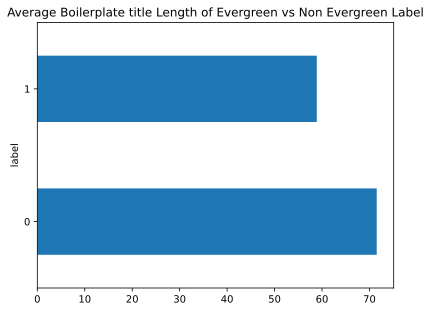

In [140]:
data.groupby("label")["boilerplate title lenght"].mean().plot(kind='barh',title="Average Boilerplate title Length of Evergreen vs Non Evergreen Label")

<Axes: title={'center': 'Average Boilerplate body Length of Evergreen vs Non Evergreen'}, ylabel='label'>

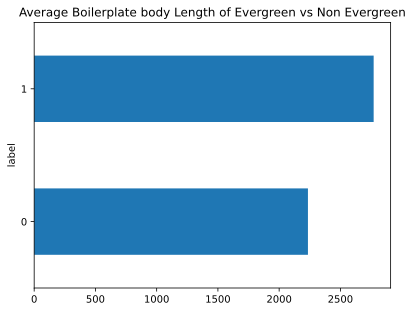

In [141]:
data.groupby("label")["boilerplate body lenght"].mean().plot(kind='barh',title="Average Boilerplate body Length of Evergreen vs Non Evergreen")

In [142]:
data['alchemy_category'].value_counts().to_frame().style.background_gradient()

,count
alchemy_category,
?,2342
recreation,1229
arts_entertainment,941
business,880
health,506
sports,380
culture_politics,343
computer_internet,296
science_technology,289


In [143]:
data.groupby("alchemy_category")["label"].mean()

alchemy_category
?                     0.502135
arts_entertainment    0.371945
business              0.711364
computer_internet     0.246622
culture_politics      0.457726
gaming                0.368421
health                0.573123
law_crime             0.419355
recreation            0.684296
religion              0.416667
science_technology    0.456747
sports                0.205263
unknown               0.333333
weather               0.000000
Name: label, dtype: float64